In [5]:
from PIL import Image, ImageDraw,ImageFont, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

In [14]:
img_khaju = Image.open('input/khaju_bridge.jpg')
img_basil = Image.open('input/StBasil.jpg')
img_mountaint = Image.open('input\mountain.jpg')



Farsi text on image using PIL

In [4]:
img_draw = ImageDraw.Draw(img_khaju)

text = '"چو ایران نباشد تن من مباد"'
reshaped_text = arabic_reshaper.reshape(text) 
bidi_text = get_display(reshaped_text) 

text = bidi_text.encode().decode('utf-8')
my_font =  ImageFont.truetype('input/Ravi-Bold.ttf',200)
img_draw.text((450,200),text,(255,255,255),my_font)
img_khaju.show()

Image Histogram using PIL

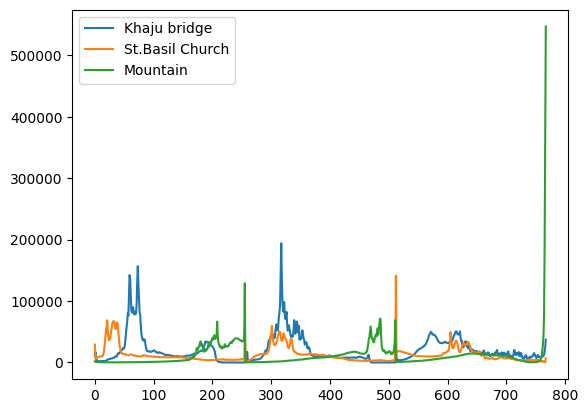

In [23]:
plt.plot(img_khaju.histogram(),label='Khaju bridge')
plt.plot(img_basil.histogram(),label='St.Basil Church')
plt.plot(img_mountaint.histogram(),label='Mountain')
plt.legend()
plt.savefig('output/fig1.png')
plt.show()



Equalize Histogram

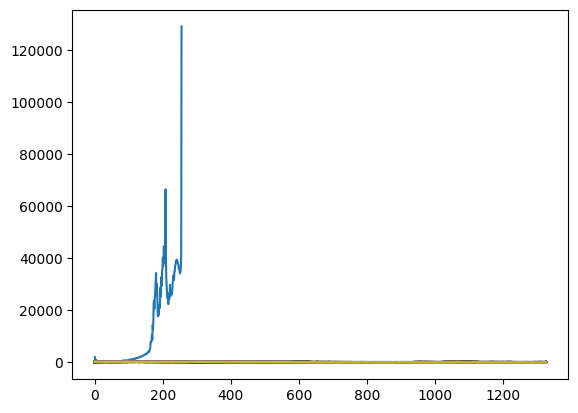

In [25]:
r, g, b = img_mountaint.split()
r_hist = r.histogram()
g_hist = g.histogram()
b_hist = b.histogram()
img_hist = img_mountaint.histogram()
plt.plot(r_hist)

r_equalize = ImageOps.equalize(r)
g_equalize = ImageOps.equalize(g)
b_equalize = ImageOps.equalize(b)
equalized_img = Image.merge("RGB",(r_equalize,g_equalize,b_equalize))

result_hist = equalized_img.histogram()
plt.plot(b_equalize)
plt.show()

Convert to Gray


In [42]:
img_gray = img_mountaint.convert("L")
img_gray_hist = img_gray.histogram()

eq_img = ImageOps.equalize(img_gray)
result_eq = np.hstack((img_gray,eq_img))
result_eq = Image.fromarray(result_eq)
result_eq.save('output/result_eq.png')